In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import datetime as dt
import pprint as pp
import pandas as pd
from IPython.display import display

In [4]:
df = pd.read_pickle('../data/player_game_table.pkl')

features = ['ast','blk','dreb','fg3_pct','fg3a','fg3m','fg_pct','fga','fgm','ft_pct',
            'fta','ftm','min','oreb','pf','plus_minus','pts','reb','stl','to','days_since_injury','fantasy_points']

In [5]:
def create_input_features(pid, n, df, feats):
    rows = df.loc[ df['player_id'] == pid]
    rows = rows.sort_values("game_date")

    X = np.zeros(( (len(rows) - (n), (len(feats)*n)) ))
    y= np.zeros((len(rows) - (n)))

    for i in range(n, (len(rows) - 1)):
        last_n = rows.iloc[(i - n) : i]
        #X[(i - n),0] = pid
        for a,feat in enumerate(feats):
            start_idx = a*n
            end_idx = start_idx + n
            X[(i - n),start_idx:end_idx] = last_n[feat].tolist()
        y[(i - n)] = rows.iloc[i]["fantasy_points"]
        
    return X, y


In [6]:
X, y = create_input_features('201935', 5, df, features)

In [86]:
from sklearn.svm import SVR

clf = SVR(C=100.0, cache_size=1000, coef0=1.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.1, verbose=True)

clf.fit(X[:300],y[0:300])


[LibSVM]

SVR(C=100.0, cache_size=1000, coef0=1.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.1, verbose=True)

In [87]:
y_out = clf.predict(X)
print(clf.score(X,y))

-0.6128432384808546


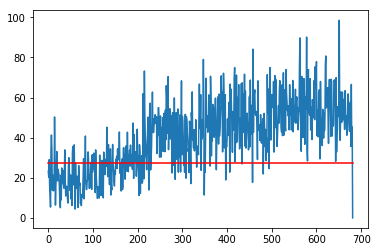

In [88]:
plt.plot([i for i in range(len(y))],y)
plt.plot([i for i in range(0,len(y))],y_out,'r')
plt.show()

In [18]:
def objfunc(order, exog, endog):
    try:
        from statsmodels.tsa.arima_model import ARIMA
        model = ARIMA(endog, order).fit()
        if not np.isnan(model.aic):
            return model.aic
        else:
            return 1000000
    except:
        return 1000000

from scipy.optimize import brute
grid = (slice(1, 10 , 1), slice(1, 10 , 1), slice(1, 10, 1))
brute(objfunc, grid, args=(y, y), finish=None)

c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsm

c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\ts

array([4., 1., 5.])

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(y, (4,1,5))
model = model.fit()
print(model.aic)

5316.942815587059


c:\users\rayne\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


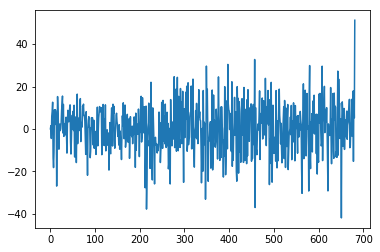

In [21]:
arima = model.predict(start=1, end=y.shape[-1])
plt.plot(list(range(len(arima))),arima)